In [66]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier as RFC
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelBinarizer


In [4]:
data = pd.read_csv("../Datasets/googleplaystore.csv")
data

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [5]:
data.info()

&lt;class &#39;pandas.core.frame.DataFrame&#39;&gt;
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [6]:
data.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


In [7]:
data["Rating"] = np.round(data["Rating"])
data["Rating"]

0        4.0
1        4.0
2        5.0
3        4.0
4        4.0
        ... 
10836    4.0
10837    5.0
10838    NaN
10839    4.0
10840    4.0
Name: Rating, Length: 10841, dtype: float64

In [8]:
data.isnull().values.any()

True

In [9]:
data[data["Rating"]!=data["Rating"]]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
23,Mcqueen Coloring pages,ART_AND_DESIGN,NaN,61,7.0M,"100,000+",Free,0,Everyone,Art & Design;Action & Adventure,"March 7, 2018",1.0.0,4.1 and up
113,Wrinkles and rejuvenation,BEAUTY,NaN,182,5.7M,"100,000+",Free,0,Everyone 10+,Beauty,"September 20, 2017",8.0,3.0 and up
123,Manicure - nail design,BEAUTY,NaN,119,3.7M,"50,000+",Free,0,Everyone,Beauty,"July 23, 2018",1.3,4.1 and up
126,Skin Care and Natural Beauty,BEAUTY,NaN,654,7.4M,"100,000+",Free,0,Teen,Beauty,"July 17, 2018",1.15,4.1 and up
129,"Secrets of beauty, youth and health",BEAUTY,NaN,77,2.9M,"10,000+",Free,0,Mature 17+,Beauty,"August 8, 2017",2.0,2.3 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10824,Cardio-FR,MEDICAL,NaN,67,82M,"10,000+",Free,0,Everyone,Medical,"July 31, 2018",2.2.2,4.4 and up
10825,Naruto & Boruto FR,SOCIAL,NaN,7,7.7M,100+,Free,0,Teen,Social,"February 2, 2018",1.0,4.0 and up
10831,payermonstationnement.fr,MAPS_AND_NAVIGATION,NaN,38,9.8M,"5,000+",Free,0,Everyone,Maps & Navigation,"June 13, 2018",2.0.148.0,4.0 and up
10835,FR Forms,BUSINESS,NaN,0,9.6M,10+,Free,0,Everyone,Business,"September 29, 2016",1.1.5,4.0 and up


In [10]:
nans = data[data["Rating"]!=data["Rating"]].index.tolist()
nans

[23,
 113,
 123,
 126,
 129,
 130,
 134,
 163,
 180,
 185,
 227,
 321,
 478,
 479,
 480,
 610,
 613,
 617,
 620,
 621,
 623,
 624,
 626,
 627,
 628,
 629,
 630,
 631,
 632,
 635,
 637,
 638,
 639,
 641,
 642,
 643,
 644,
 647,
 648,
 649,
 650,
 651,
 652,
 653,
 658,
 659,
 660,
 666,
 669,
 683,
 698,
 704,
 1013,
 1024,
 1025,
 1032,
 1033,
 1034,
 1039,
 1041,
 1043,
 1045,
 1046,
 1177,
 1180,
 1455,
 1469,
 1478,
 1484,
 1489,
 1517,
 1519,
 1520,
 1530,
 1534,
 1536,
 1537,
 1539,
 1540,
 1552,
 1557,
 1559,
 2111,
 2265,
 2280,
 2294,
 2356,
 2390,
 2419,
 2422,
 2423,
 2424,
 2425,
 2430,
 2431,
 2432,
 2433,
 2434,
 2435,
 2436,
 2437,
 2438,
 2439,
 2440,
 2441,
 2442,
 2443,
 2446,
 2447,
 2449,
 2451,
 2453,
 2456,
 2460,
 2461,
 2462,
 2465,
 2466,
 2467,
 2468,
 2469,
 2470,
 2471,
 2473,
 2474,
 2478,
 2479,
 2480,
 2481,
 2483,
 2485,
 2498,
 2501,
 2502,
 2503,
 2513,
 2516,
 2529,
 2540,
 3252,
 3258,
 3577,
 3579,
 3580,
 3583,
 3585,
 3589,
 3599,
 3603,
 3616,
 36

In [11]:
data = data.drop(nans,axis = 0)

In [12]:
data[data["Rating"]!=data["Rating"]]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


In [13]:
data.isnull().values.any()

True

In [14]:
data.info()

&lt;class &#39;pandas.core.frame.DataFrame&#39;&gt;
Int64Index: 9367 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9367 non-null   object 
 1   Category        9367 non-null   object 
 2   Rating          9367 non-null   float64
 3   Reviews         9367 non-null   object 
 4   Size            9367 non-null   object 
 5   Installs        9367 non-null   object 
 6   Type            9367 non-null   object 
 7   Price           9367 non-null   object 
 8   Content Rating  9366 non-null   object 
 9   Genres          9367 non-null   object 
 10  Last Updated    9367 non-null   object 
 11  Current Ver     9363 non-null   object 
 12  Android Ver     9364 non-null   object 
dtypes: float64(1), object(12)
memory usage: 1.0+ MB


In [182]:
data_clean = data.copy()
for col in ["Content Rating","Current Ver","Android Ver"]:
    data_clean = data_clean.drop(data_clean[data_clean[col]!=data_clean[col]].index.tolist(),axis = 0)

In [183]:
data_clean

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.0,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,4.0,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,5.0,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.0,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.0,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10834,FR Calculator,FAMILY,4.0,7,2.6M,500+,Free,0,Everyone,Education,"June 18, 2017",1.0.0,4.1 and up
10836,Sya9a Maroc - FR,FAMILY,4.0,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.0,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [184]:
data_clean.info()

&lt;class &#39;pandas.core.frame.DataFrame&#39;&gt;
Int64Index: 9360 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9360 non-null   object 
 1   Category        9360 non-null   object 
 2   Rating          9360 non-null   float64
 3   Reviews         9360 non-null   object 
 4   Size            9360 non-null   object 
 5   Installs        9360 non-null   object 
 6   Type            9360 non-null   object 
 7   Price           9360 non-null   object 
 8   Content Rating  9360 non-null   object 
 9   Genres          9360 non-null   object 
 10  Last Updated    9360 non-null   object 
 11  Current Ver     9360 non-null   object 
 12  Android Ver     9360 non-null   object 
dtypes: float64(1), object(12)
memory usage: 1023.8+ KB


In [185]:
data_clean.isnull().values.any()

False

In [186]:
def temp(x):
    if "M" in x:
        return(x[:-1])
    elif "k" in x:
        return(float(x[:-1])/1000)
    else:
        return 0
data_clean["Size"] = data_clean["Size"].apply(temp)

In [187]:
def inst(x):
    if "+" in x:
        return(x[:-1])
data_clean["Installs"] = data_clean["Installs"].apply(inst)

In [188]:
data_clean

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.0,159,19,"10,000",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,4.0,967,14,"500,000",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,5.0,87510,8.7,"5,000,000",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.0,215644,25,"50,000,000",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.0,967,2.8,"100,000",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10834,FR Calculator,FAMILY,4.0,7,2.6,500,Free,0,Everyone,Education,"June 18, 2017",1.0.0,4.1 and up
10836,Sya9a Maroc - FR,FAMILY,4.0,38,53,"5,000",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6,100,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.0,114,0,"1,000",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [189]:
for i in ["Category","Type","Content Rating","Genres","Last Updated","Android Ver","Current Ver"]:
    vals = data_clean[i].unique()
    vic_status = {vals[j]:j for j in range(len(vals))}
    data_clean[i] = data_clean[i].map(vic_status)
    data.head()

In [190]:
#ohe = OneHotEncoder()
#for i in ["Category","Type","Content Rating","Genres","Last Updated","Android Ver","Current Ver"]:
#    data_clean[i] = data_clean[i].astype("object")
#    data_clean[i] = ohe.fit_transform(data_clean[i].values.reshape(-1,1)).toarray().tolist()

In [191]:
data_clean

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,0,4.0,159,19,"10,000",0,0,0,0,0,0,0
1,Coloring book moana,0,4.0,967,14,"500,000",0,0,0,1,1,1,0
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",0,5.0,87510,8.7,"5,000,000",0,0,0,0,2,2,0
3,Sketch - Draw & Paint,0,4.0,215644,25,"50,000,000",0,0,1,0,3,3,1
4,Pixel Draw - Number Art Coloring Book,0,4.0,967,2.8,"100,000",0,0,0,2,4,4,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10834,FR Calculator,18,4.0,7,2.6,500,0,0,0,12,304,0,5
10836,Sya9a Maroc - FR,18,4.0,38,53,"5,000",0,0,0,12,472,1864,5
10837,Fr. Mike Schmitz Audio Teachings,18,5.0,4,3.6,100,0,0,0,12,122,5,5
10839,The SCP Foundation DB fr nn5n,3,4.0,114,0,"1,000",0,0,3,5,892,3,8


In [192]:
data_Y = data_clean["Rating"]
data_X = data_clean[[i for i in data.columns if i not in ["Rating","App"]]]

In [196]:
def con_int(x):
    return int(x.replace(',',''))
data_X["Installs"] = data_X["Installs"].apply(con_int)

In [199]:
data_X["Price"].unique()

array([&#39;0&#39;, &#39;$4.99&#39;, &#39;$3.99&#39;, &#39;$6.99&#39;, &#39;$7.99&#39;, &#39;$5.99&#39;, &#39;$2.99&#39;, &#39;$3.49&#39;,
       &#39;$1.99&#39;, &#39;$9.99&#39;, &#39;$7.49&#39;, &#39;$0.99&#39;, &#39;$9.00&#39;, &#39;$5.49&#39;, &#39;$10.00&#39;,
       &#39;$24.99&#39;, &#39;$11.99&#39;, &#39;$79.99&#39;, &#39;$16.99&#39;, &#39;$14.99&#39;, &#39;$29.99&#39;,
       &#39;$12.99&#39;, &#39;$2.49&#39;, &#39;$10.99&#39;, &#39;$1.50&#39;, &#39;$19.99&#39;, &#39;$15.99&#39;, &#39;$33.99&#39;,
       &#39;$39.99&#39;, &#39;$3.95&#39;, &#39;$4.49&#39;, &#39;$1.70&#39;, &#39;$8.99&#39;, &#39;$1.49&#39;, &#39;$3.88&#39;,
       &#39;$399.99&#39;, &#39;$17.99&#39;, &#39;$400.00&#39;, &#39;$3.02&#39;, &#39;$1.76&#39;, &#39;$4.84&#39;, &#39;$4.77&#39;,
       &#39;$1.61&#39;, &#39;$2.50&#39;, &#39;$1.59&#39;, &#39;$6.49&#39;, &#39;$1.29&#39;, &#39;$299.99&#39;, &#39;$379.99&#39;,
       &#39;$37.99&#39;, &#39;$18.99&#39;, &#39;$389.99&#39;, &#39;$8.49&#39;, &#39;$1.75&#39;, &#39

In [200]:
def con_price(x):
    return float(x.replace('$',''))
data_X["Price"] = data_X["Price"].apply(con_price)

In [205]:
train_data,test_data,train_labels,test_labels = train_test_split(data_X,data_Y,test_size  = 0.2)
print(train_data.shape,train_labels.shape)
print(test_data.shape,test_labels.shape)

(7488, 11) (7488,)
(1872, 11) (1872,)


In [201]:
model_forest = RFC()
model_forest.fit(train_data,train_labels)

RandomForestClassifier()

In [207]:
print(model_forest.score(train_data,train_labels))
print(model_forest.score(test_data,test_labels))

1.0
1.0


In [214]:
model_forest.decision_path(train_data.loc[0].values.reshape(1,-1))

(&lt;1x381262 sparse matrix of type &#39;&lt;class &#39;numpy.int64&#39;&gt;&#39;
 	with 1237 stored elements in Compressed Sparse Row format&gt;,
 array([     0,   3655,   7450,  11249,  15072,  18827,  22636,  26363,
         30118,  33911,  37670,  41485,  45274,  48979,  52808,  56679,
         60452,  64317,  68054,  71907,  75682,  79455,  83166,  86873,
         90718,  94565,  98454, 102259, 106192, 110039, 113908, 117705,
        121656, 125443, 129240, 133035, 136824, 140647, 144448, 148331,
        152068, 155843, 159636, 163543, 167346, 171147, 175000, 178939,
        182888, 186701, 190554, 194309, 198162, 202075, 205934, 209661,
        213530, 217463, 221314, 225077, 229026, 232767, 236610, 240423,
        244216, 247979, 251808, 255639, 259632, 263513, 267266, 270987,
        274696, 278469, 282336, 286111, 289812, 293645, 297412, 301231,
        305024, 308913, 312762, 316605, 320362, 324175, 328012, 331745,
        335574, 339469, 343328, 347069, 350760, 354627, 35847

&lt;matplotlib.axes._subplots.AxesSubplot at 0x226315c6588&gt;

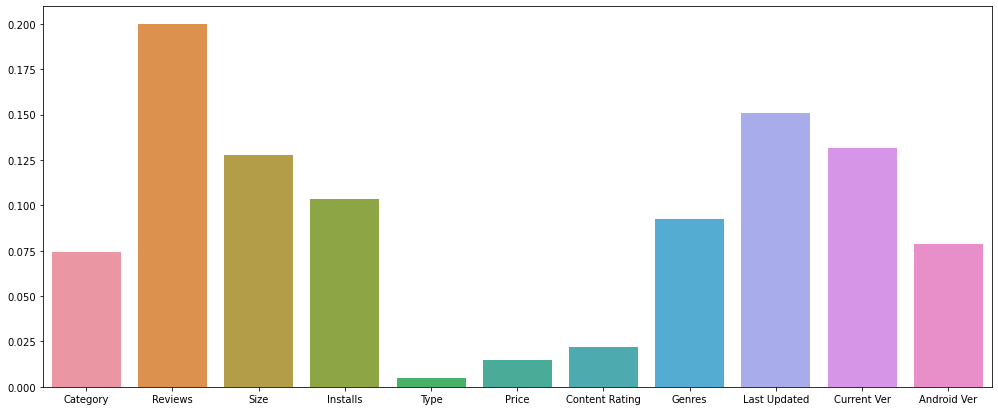

In [225]:
plt.figure(figsize = (17,7))
sns.barplot(x = train_data.columns,y = model_forest.feature_importances_)